# K-means clustering - example I

### Ex.1 Please analyse the function parameters and generated output.

In [1]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

help(make_blobs)
plt.style.use('dark_background')

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

### Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.

In [2]:
X, y = make_blobs(n_samples=120, centers=4, n_features=2, cluster_std=0.40)

### Ex.3 Analyse the x and y shape.

In [3]:
print(f'Shape X: {X.shape}')
print(f'Shape y: {y.shape}')

Shape X: (120, 2)
Shape y: (120,)


### Ex.4 Plot the data samples in X to see the clusters.

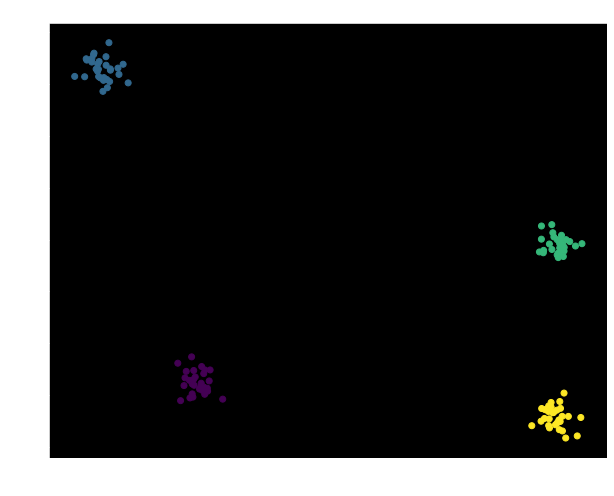

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Blobs')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Ex.5 Run the implemented KMeans function, fit the model and predict the outcome.

In [5]:
kmeans = KMeans(n_clusters=4, init='random')
kmeans.fit(X)
y_pred = kmeans.predict(X)

### Ex.6 Plot the results in order to see whether the clustering worked.

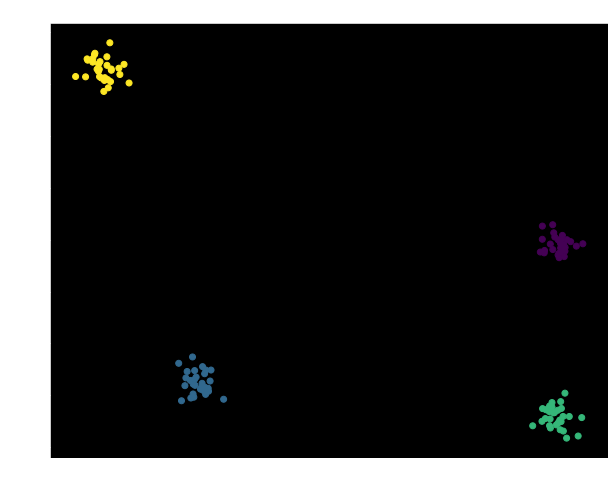

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Blobs')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

### Ex.7 Calculate inertia Inertia_ or Dunn index Package jgmcvi (optional).

In [7]:
print(f'Inertia: {kmeans.inertia_}')

Inertia: 35.220264313653956


# K-means clustering - example II

### Change the parameters of our data generation process to create different-looking clusters (eg. about 5 clusters and cluster_std=0.8).

In [8]:
X, y = make_blobs(n_samples=120, centers=5, n_features=2, cluster_std=0.8)

### Ex.1 Plot the data

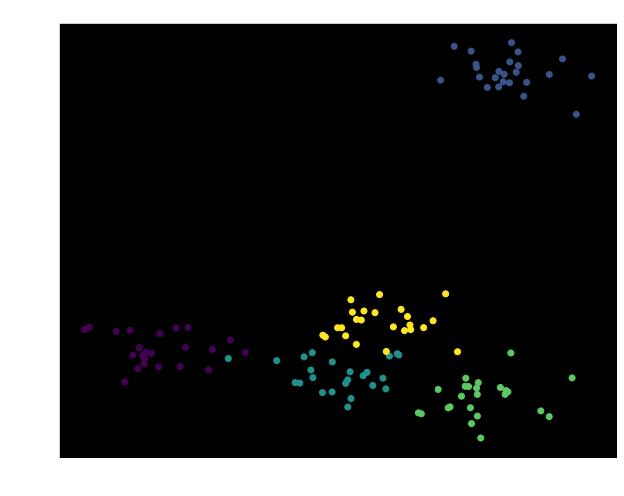

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Blobs')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Ex.2 Predict for the same nb. of clusters = 5.

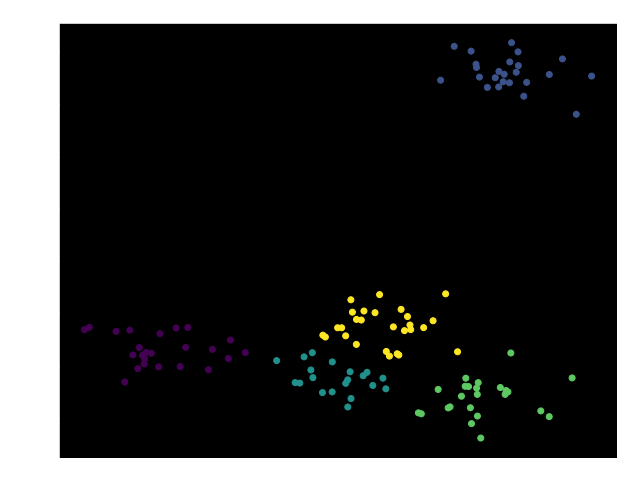

In [10]:
kmeans = KMeans(n_clusters=5, init='random')
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Blobs')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Not every blob was recognized successfully.

### Ex.3 Predict for 2 instead of 5 clusters.

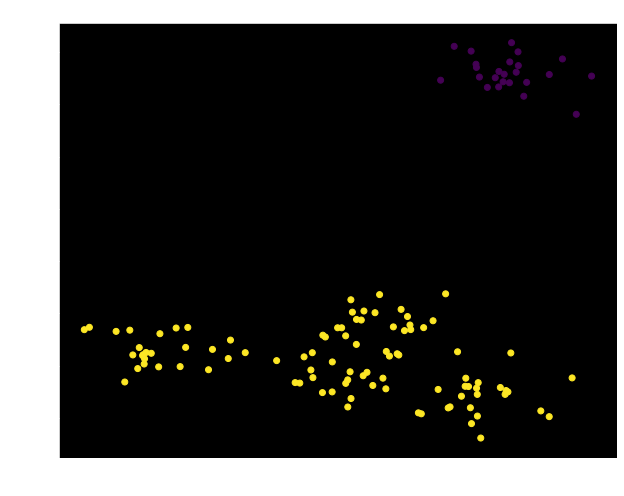

In [11]:
kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

plt.title('Blobs')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Ex.4 Calculate inertia or Dunn index (optiona).

In [12]:
print(f'Inertia: {kmeans.inertia_}')

Inertia: 846.8276099180852


# K-means ++

### Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function:

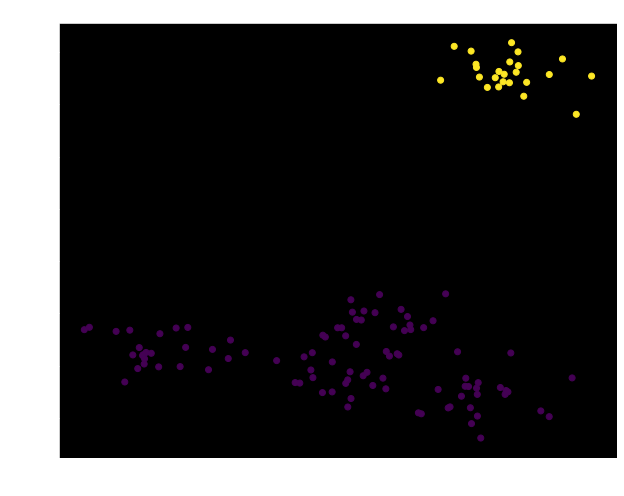

In [13]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Blobs')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Ex.2 Calculate inertia or Dunn index.

In [14]:
print(f'Inertia: {kmeans.inertia_}')

Inertia: 846.8276099180852


# Elbow method

### Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.

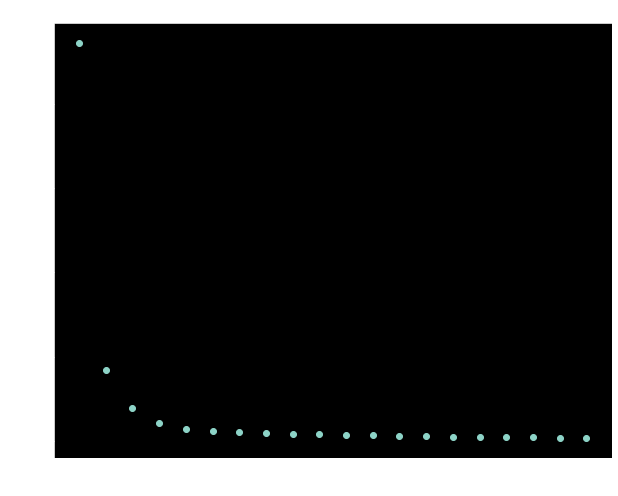

In [15]:
import warnings
warnings.filterwarnings("ignore")

num = range(1, 21)
iner = []
for n in num:
    kn = KMeans(n_clusters=n).fit(X, y)
    iner.append(kn.inertia_ )

plt.figure(figsize=(10,8))
plt.scatter(num, iner)
plt.title('Blobs')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Inertia becomes smaller when the number of clusters increases.

### Ex.2 Plot the distortions of K-Means.

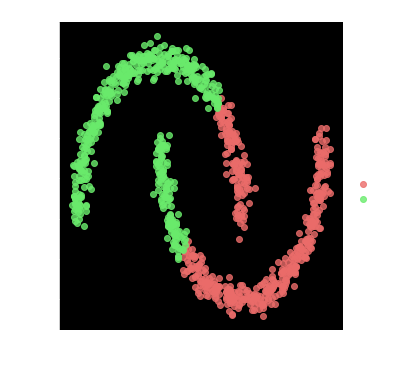

In [16]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

#TODO: Kmeans
kmeans = KMeans(n_clusters=2).fit(x)
y_km = kmeans.predict(x)

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()

Data was not recognized successfully. Kmeans is not a good algorithm fo moon dataset.

# Clustering II - hierarchical methods

### Creating dataset with blobs

In [17]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

### Ex.1 Plot the data.

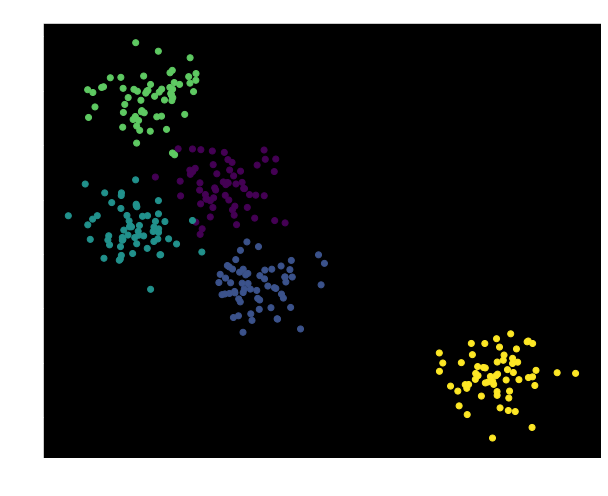

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title('Blobs')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Ex.2 Use the Means function with k=2 to assign points to clusters.

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

### Ex.3 Use the scipy libraries to draw the dendrogram for the data:

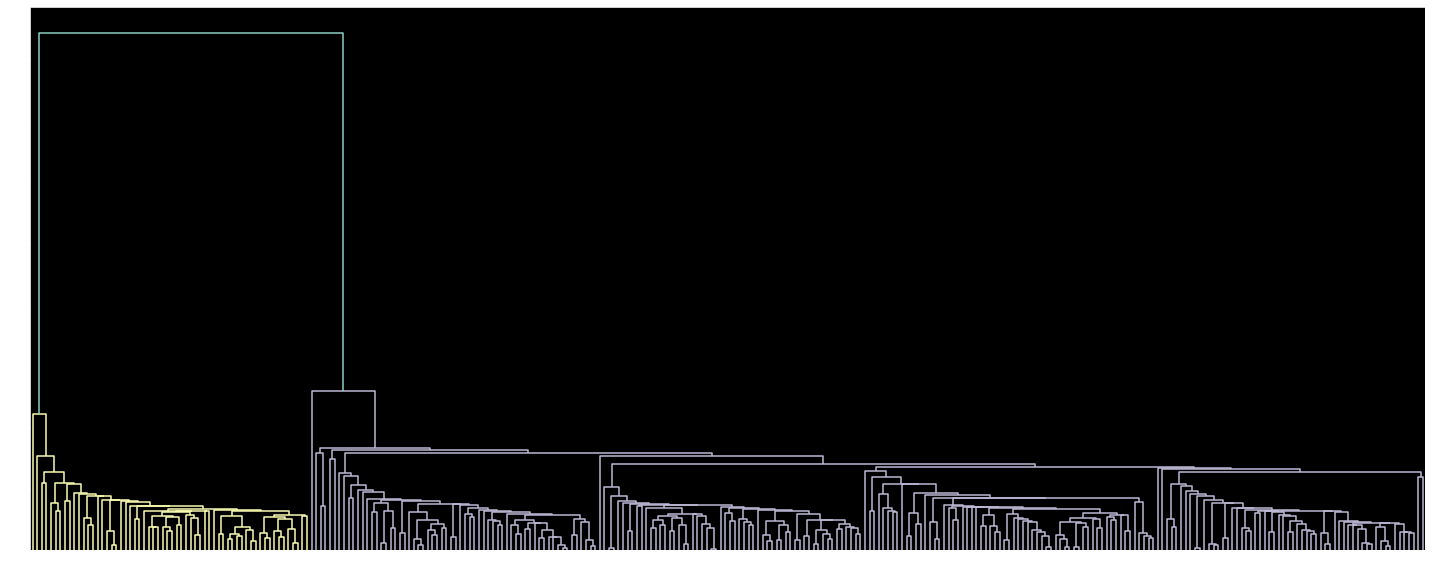

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

### Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

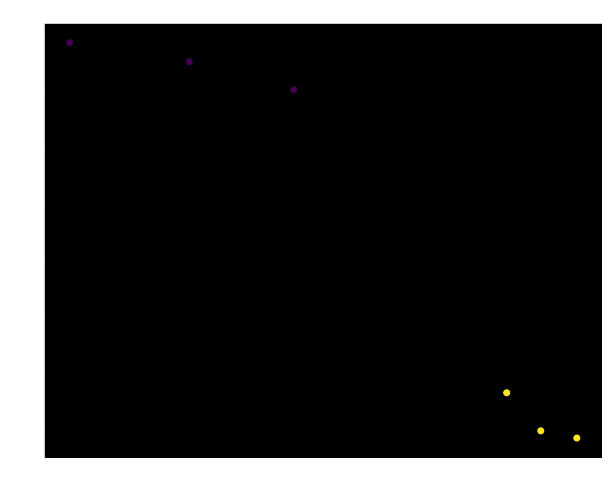

In [21]:
X_new, y_new_true = make_blobs(n_samples=6, centers=2,cluster_std=0.3, random_state=0)

plt.figure(figsize=(10,8))
plt.scatter(X_new[:,0], X_new[:,1], c=y_new_true)
plt.title('Blobs')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

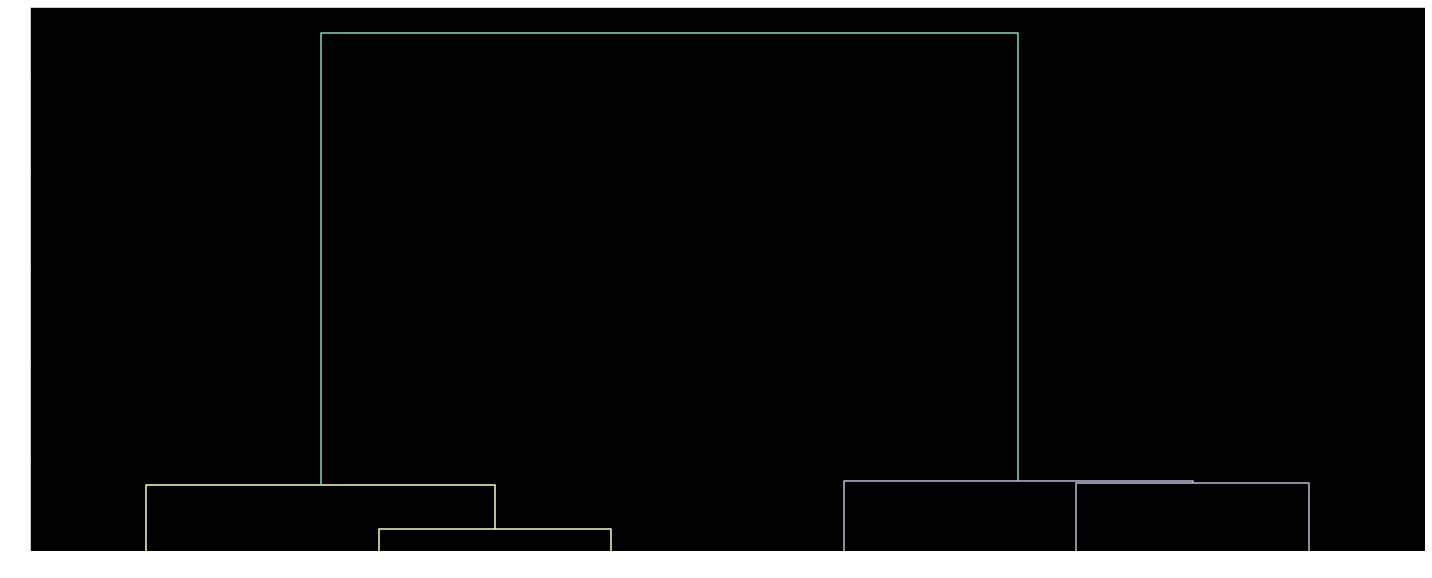

In [22]:
Z_new = linkage(X_new, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_new)
plt.show()

# Agglomerative clustering

In [23]:
df = pd.read_csv("shopping_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.

In [24]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]

### Ex.6 Create a dendrogram to chose the appropriate k value.

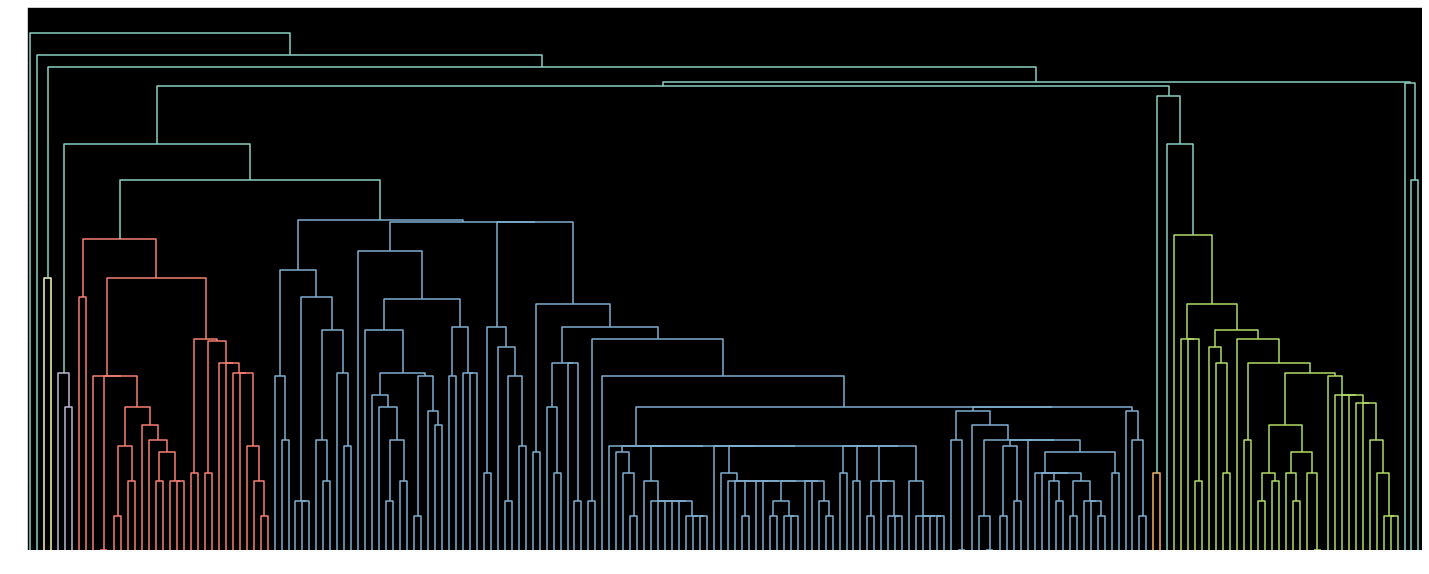

In [25]:
Z_new = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_new)
plt.show()

### Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

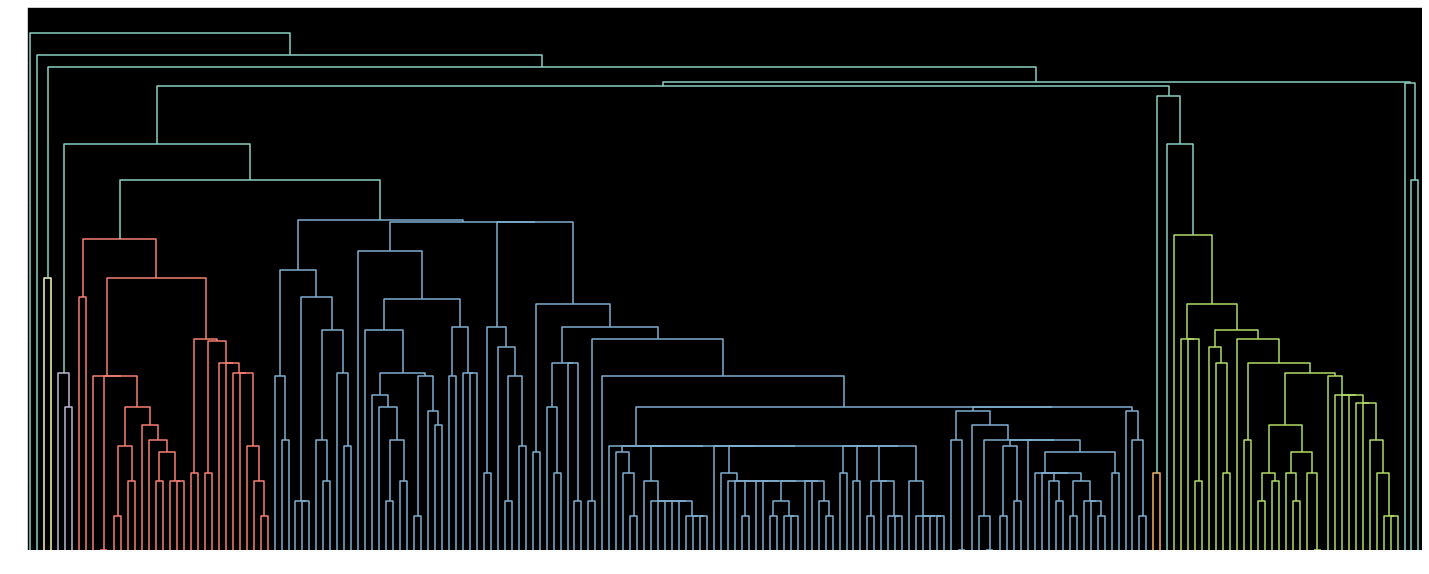

In [26]:
# single linkage
Z_new = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_new)
plt.show()

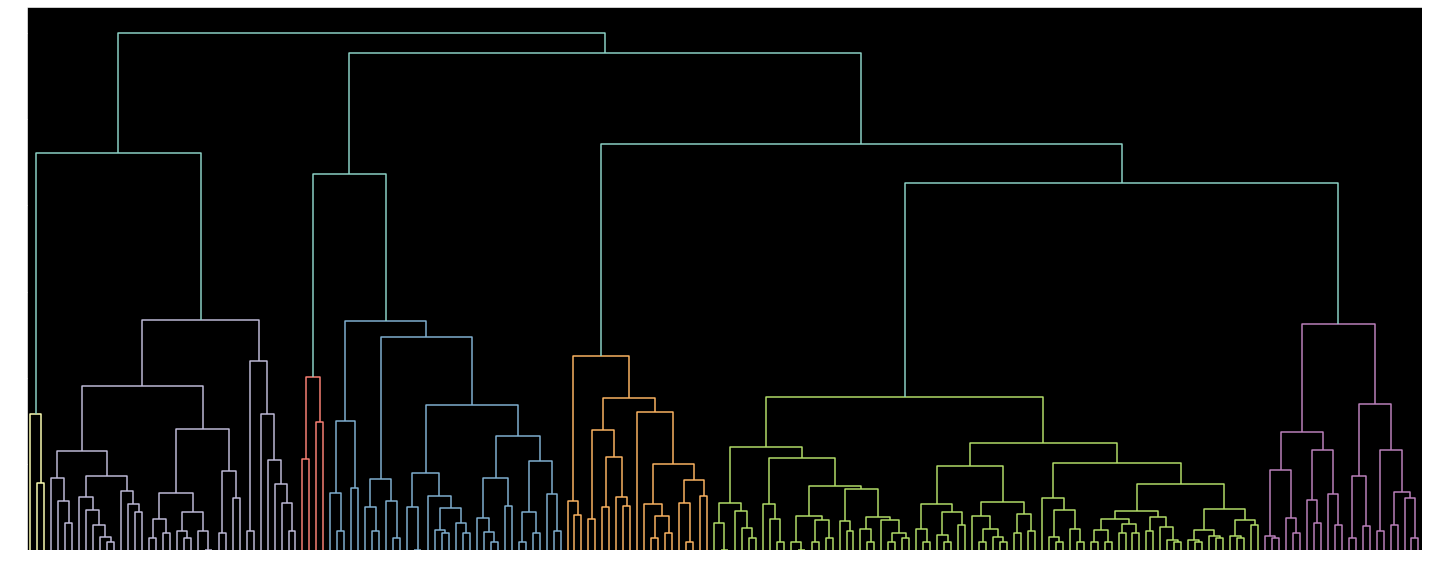

In [27]:
# average linkage
Z_new = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_new)
plt.show()

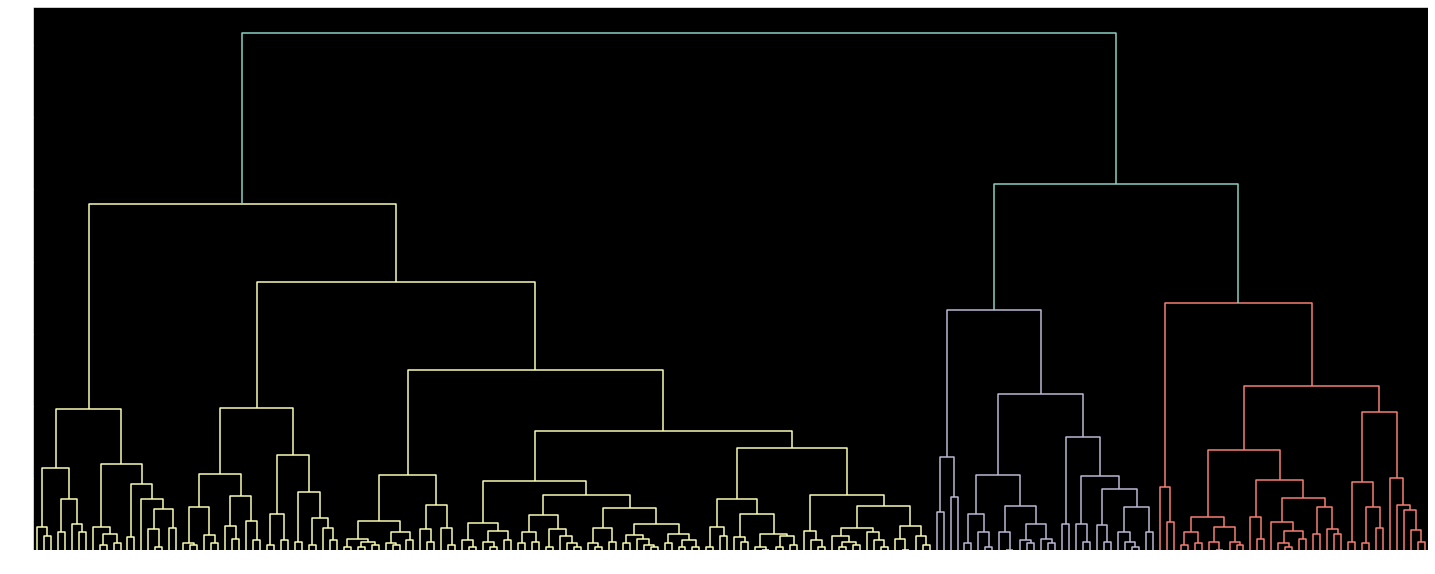

In [28]:
# complete linkage
Z_new = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_new)
plt.show()

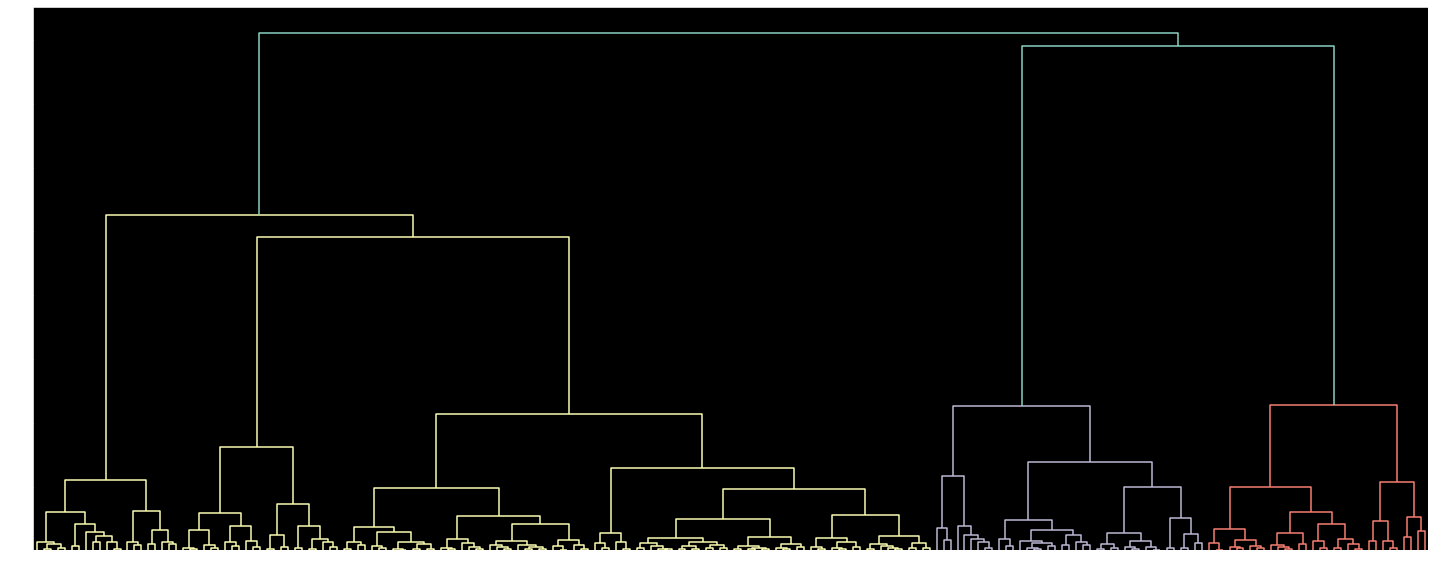

In [29]:
# ward
Z_new = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_new)
plt.show()

### Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.

In [30]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)
AgglomerativeClustering()

AgglomerativeClustering()

### Ex.9 Plot the clusters to see how actually our data has been clustered.

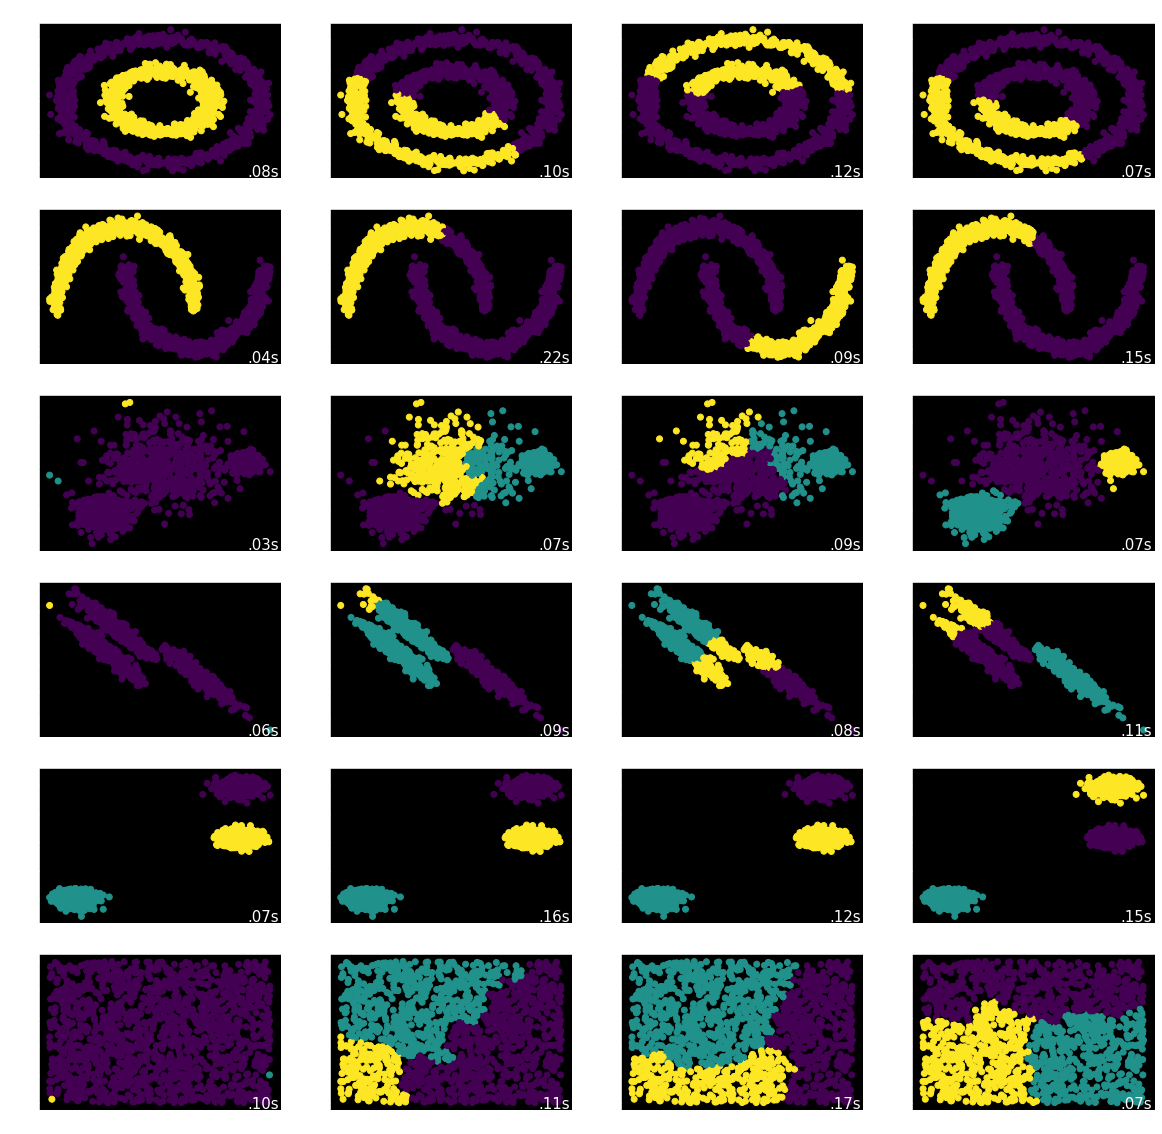

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs, make_moons, make_circles
import numpy as np
import time

linkages = ["single",'average','complete','ward']
plt.figure(figsize=(20, 20))

for i in range(6):
    if i == 0:
        X, y = make_circles(n_samples=1500, factor = 0.5, noise=.05)
        num = 2
    elif i == 1:
        X, y = make_moons(n_samples=1500, noise=.05)
        num = 2
    elif i == 2:
        X, y = make_blobs(n_samples=1500, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=170)
        num = 3
    elif i == 3:
        X, y = make_blobs(n_samples=1500, centers=3, random_state=170)
        transformation = [[0.6, -0.6], [-0.4, 0.8]]
        X_aniso = np.dot(X, transformation)
        X = X_aniso
        num = 3
    elif i == 4:
        X, y = make_blobs(n_samples=1500, centers=3, cluster_std=0.8, random_state=8)
        num = 3
    else:
        X, y = np.random.rand(1500, 2), None
        num = 3

    t0 = time.time()
    single_link = AgglomerativeClustering(linkage=linkages[0],n_clusters=num).fit(X)
    y_single = single_link.fit_predict(X)
    t1 = time.time()

    plt.subplot(6,4,1+i*4)
    plt.scatter(X[:,0], X[:,1], c=y_single)
    plt.text( 0.99, 0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
    if i == 0:
        plt.title("Single Linkage")

    t0 = time.time()
    average_link = AgglomerativeClustering(linkage=linkages[1],n_clusters=num).fit(X)
    y_average = average_link.fit_predict(X)
    t1 = time.time()

    plt.subplot(6,4,2+i*4)
    plt.text( 0.99, 0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
    plt.scatter(X[:,0], X[:,1], c=y_average)
    if i == 0:
        plt.title("Average Linkage")

    t0 = time.time()
    complete_link = AgglomerativeClustering(linkage=linkages[2],n_clusters=num).fit(X)
    y_complete = complete_link.fit_predict(X)
    t1 = time.time()

    plt.subplot(6,4,3+i*4)
    plt.text( 0.99, 0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
    plt.scatter(X[:,0], X[:,1], c=y_complete)
    if i == 0:
        plt.title("Complete Linkage")

    t0 = time.time()
    ward_link = AgglomerativeClustering(linkage=linkages[3],n_clusters=num).fit(X)
    y_ward = ward_link.fit_predict(X)
    t1 = time.time()

    plt.subplot(6,4,4+i*4)
    plt.text( 0.99, 0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
    plt.scatter(X[:,0], X[:,1], c=y_ward)
    if i == 0:
        plt.title("Ward Linkage")

plt.show()

# Selecting the number of clusters with silhouette analysis on KMeans clustering

### Ex.1 Create the dataset

In [46]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

### Ex.2 Determine the cluster range [2,3….]

In [47]:
cluster_range = list(range(2,7))

### Ex.3 Iterate for all the values in cluster range

In [48]:
from sklearn.metrics import silhouette_samples,silhouette_score

for n in cluster_range:
    kmeans = KMeans(n_clusters=n).fit(X)
    y_pred = kmeans.predict(X)

    print('=================================')
    print(f"Dla liczby grup równej {n}:\nSilhouette_score: {silhouette_score(X,y_pred)}")
    # print(f'Silhouette_samples: {silhouette_samples(X,y_pred)}\n')
    print('=================================\n')

Dla liczby grup równej 2:
Silhouette_score: 0.7049787496083262

Dla liczby grup równej 3:
Silhouette_score: 0.5882004012129721

Dla liczby grup równej 4:
Silhouette_score: 0.6505186632729437

Dla liczby grup równej 5:
Silhouette_score: 0.5745566973301872

Dla liczby grup równej 6:
Silhouette_score: 0.5148501363262362



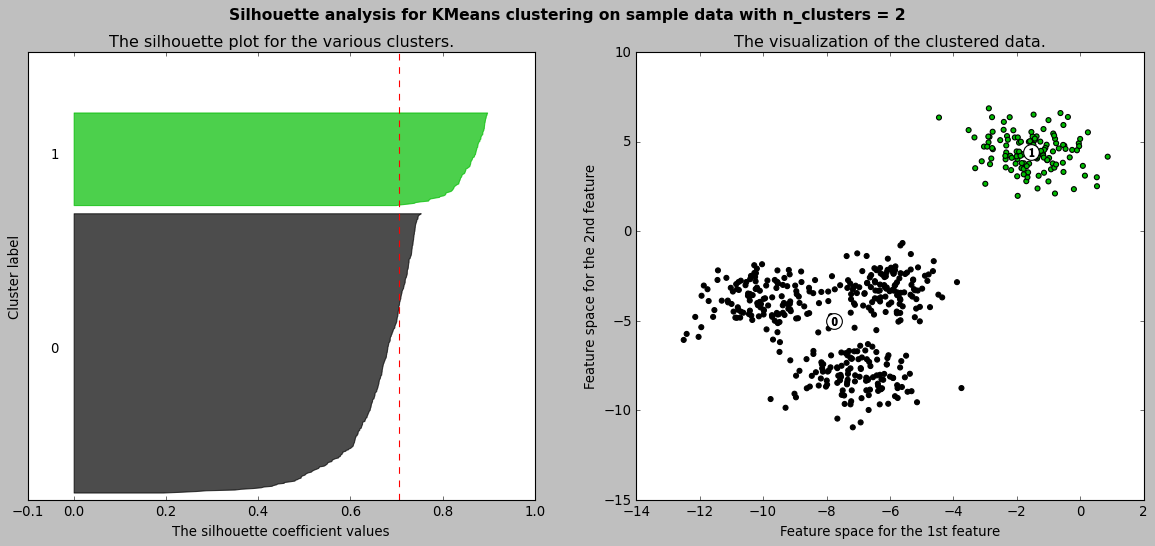

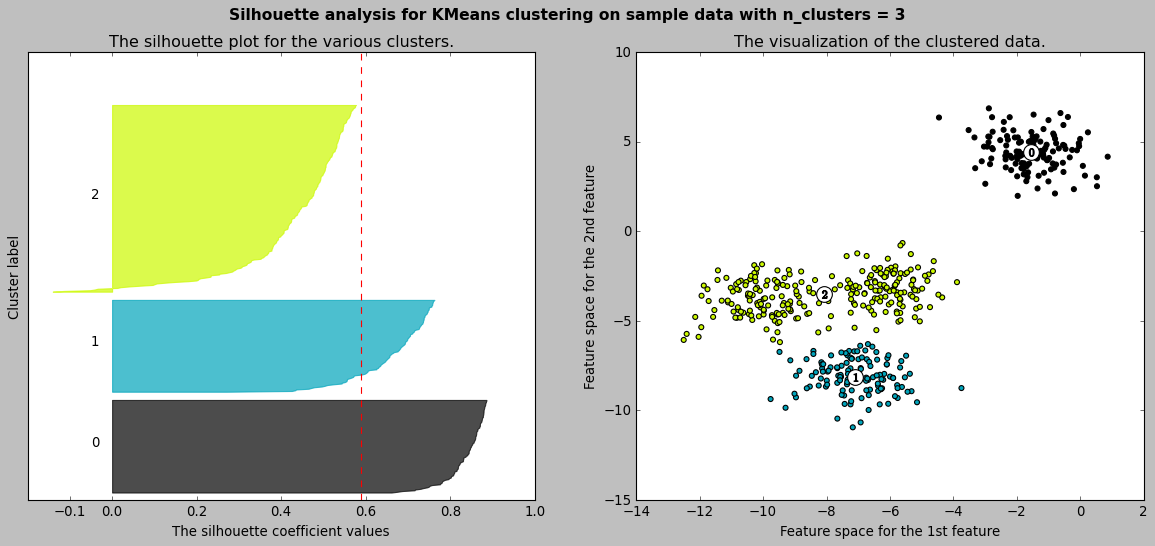

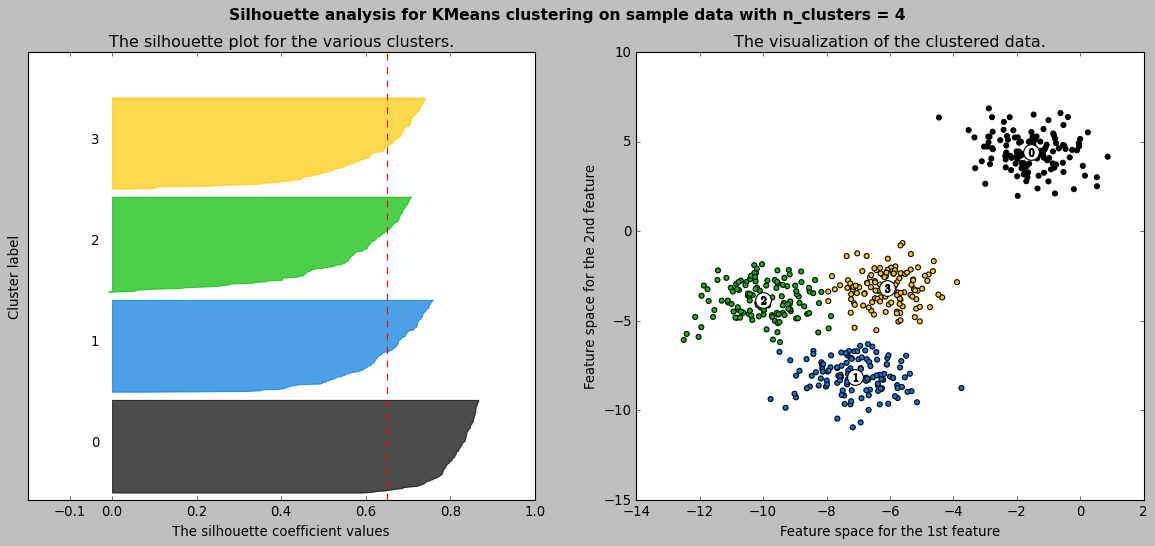

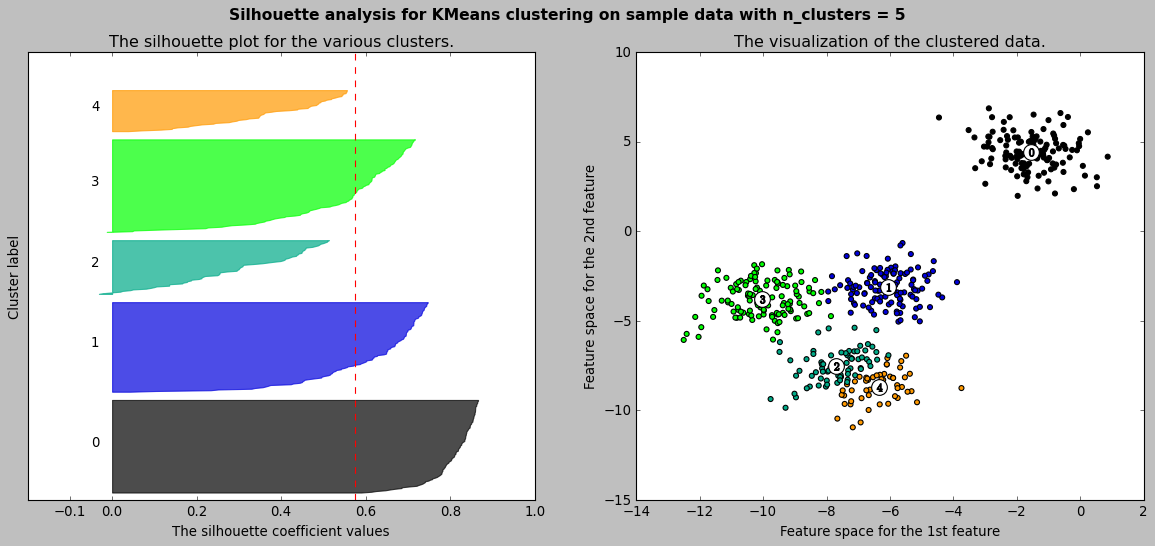

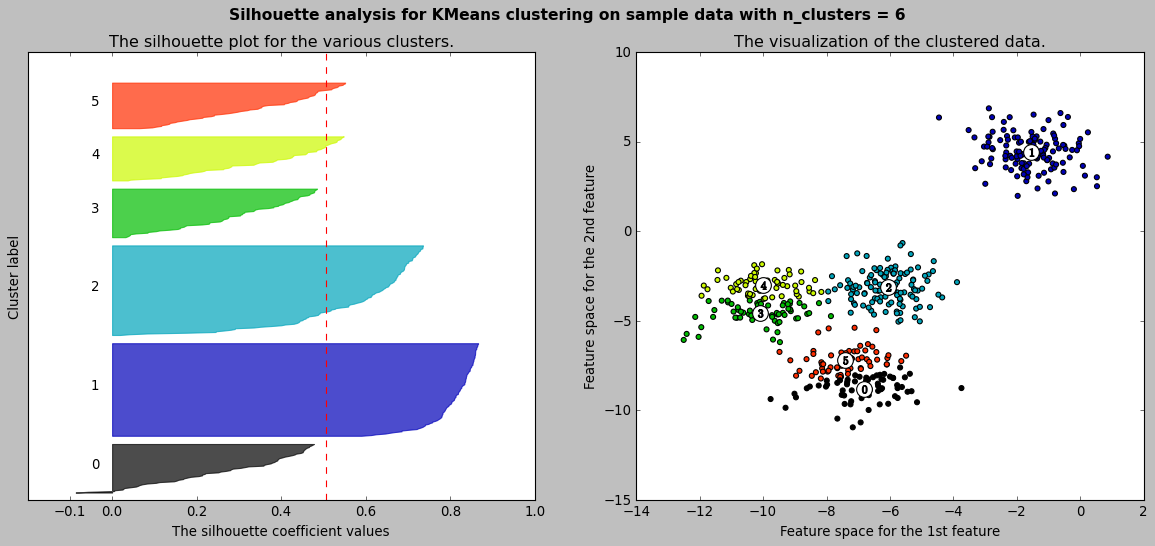

In [49]:
import matplotlib.cm as cm
import numpy as np
plt.style.use('classic')

for n_clusters in cluster_range:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    km = KMeans(n_clusters=n_clusters)
    km_y_pred = km.fit_predict(X)

    silhouette_avg = silhouette_score(X, km_y_pred)
    sample_silhouette_values = silhouette_samples(X, km_y_pred)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[km_y_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color,
            edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(km_y_pred.astype(float) / n_clusters)
    
    ax2.scatter(X[:, 0], X[:, 1],c=colors)

    ax2.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], 
                marker="o",c="white",alpha=1,s=200,edgecolor="k",)

    for i, c in enumerate(km.cluster_centers_):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle( f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

plt.show()

# DBSCAN - density based clusterring

### Ex. Compare DBSCAN algorithm with k-means on the moon dataset.

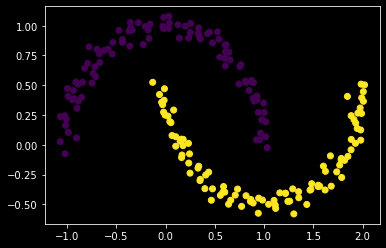

In [35]:
from sklearn.cluster import DBSCAN
plt.style.use('dark_background')

# Original moons
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

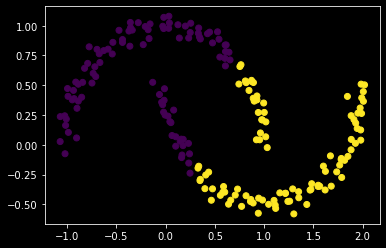

In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:,0],x[:,1],c=y_pred)
plt.show()

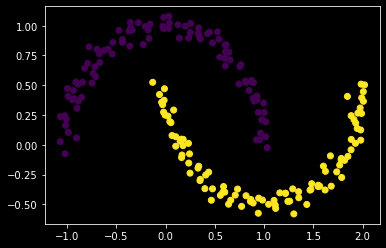

In [37]:
dbsc = DBSCAN(eps=0.2, min_samples=2).fit(x)
dbsc_pred = dbsc.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=dbsc_pred)
plt.show()

### Other tests

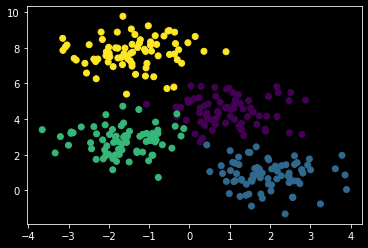

In [38]:
# Original blobs
x, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

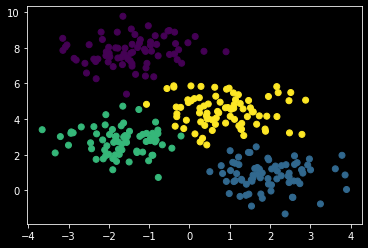

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:,0],x[:,1],c=y_pred)
plt.show()

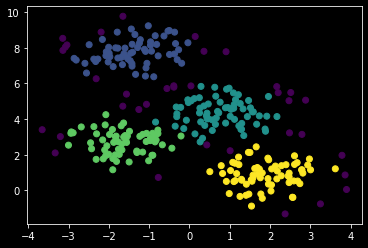

In [40]:
dbsc = DBSCAN(eps=0.8, min_samples=16).fit(x)
dbsc_pred = dbsc.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=dbsc_pred)
plt.show()

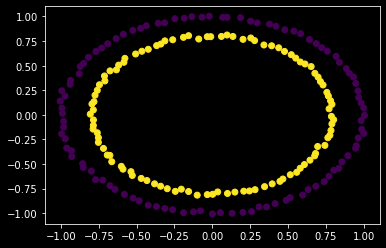

In [41]:
# Original blobs
x, y = make_circles(n_samples=200, noise=.01, random_state=0)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

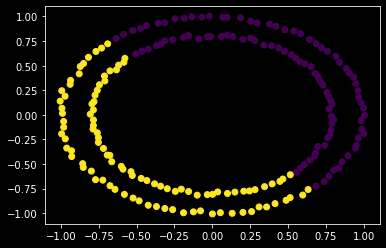

In [42]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:,0],x[:,1],c=y_pred)
plt.show()

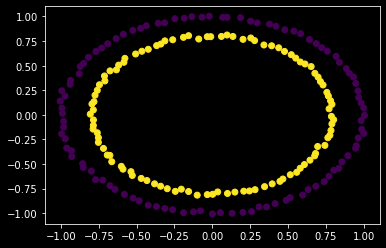

In [43]:
dbsc = DBSCAN(eps=0.1, min_samples=1).fit(x)
dbsc_pred = dbsc.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=dbsc_pred)
plt.show()

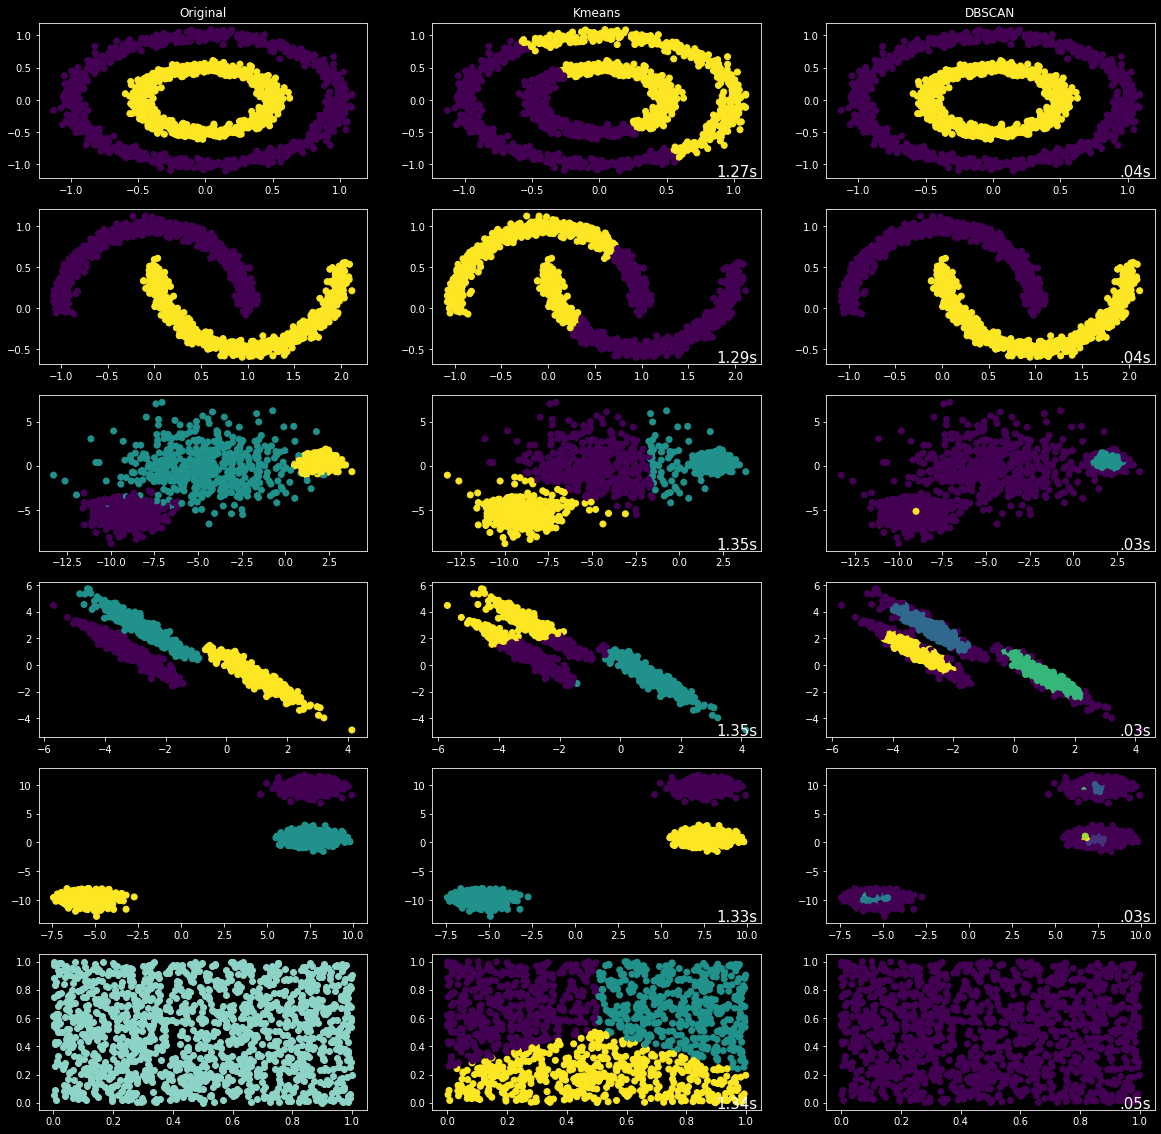

In [44]:

plt.figure(figsize=(20, 20))

for i in range(6):
    if i == 0:
        X, y = make_circles(n_samples=1500, factor = 0.5, noise=.05)
        num = 2
    elif i == 1:
        X, y = make_moons(n_samples=1500, noise=.05)
        num = 2
    elif i == 2:
        X, y = make_blobs(n_samples=1500, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=170)
        num = 3
    elif i == 3:
        X, y = make_blobs(n_samples=1500, centers=3, random_state=170)
        transformation = [[0.6, -0.6], [-0.4, 0.8]]
        X_aniso = np.dot(X, transformation)
        X = X_aniso
        num = 3
    elif i == 4:
        X, y = make_blobs(n_samples=1500, centers=3, cluster_std=0.8, random_state=8)
        num = 3
    else:
        X, y = np.random.rand(1500, 2), None
        num = 3


    plt.subplot(6,3,1+i*3)
    plt.scatter(X[:,0], X[:,1], c=y)
    if i == 0:
        plt.title("Original")

    t0 = time.time()
    kmns = KMeans(n_clusters=num).fit(X)
    y_kmns = kmns.fit_predict(X)
    t1 = time.time()

    plt.subplot(6,3,2+i*3)
    plt.text( 0.99, 0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
    plt.scatter(X[:,0], X[:,1], c=y_kmns)
    if i == 0:
        plt.title("Kmeans")

    t0 = time.time()
    dbscn = DBSCAN(eps=0.2, min_samples=15).fit(X)
    y_dbscn = dbscn.fit_predict(X)
    t1 = time.time()

    plt.subplot(6,3,3+i*3)
    plt.text( 0.99, 0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
    plt.scatter(X[:,0], X[:,1], c=y_dbscn)
    if i == 0:
        plt.title("DBSCAN")

plt.show()

DBSCAN sprawdza się najlepiej przy półksiężycach - możliwość dostosowania parametru eps i min_samples daje możliwość lepszego dostosowania, czego wynikiem jest znacznie lepszy wynik niż dla Kmeans.

Dla blobów lepiej poradził sobie Kmeans, ale odpowiednio dostosowany DBSCAN (lepiej dobane parametry) mogłyby dać porównywalne wyniki lub nawet lepsze (gdyż Kmeans nie zadziała idealnie, chyba, że skupiska są od siebie oddalone). W większości przypadków jednak, DBSCAN wyodrębnia główne grupy, ale pomija elementy na krańcach grup i przerzuca je do osobnej grupy.

Dla kółek, Kmeans nie dał dobrych wyników, gdyż grupował według własnej zasady. DBSCAN dał dobry wynik, jednak należało dobrać odpowiednie parametry. Dodatkowo, przy większym zaszumieniu występuje problem również z wykorzystaniem DBSCAN i grupy są niepoprawne

Można więc uznać, że użycie DBSCAN oraz Kmeans zależy od zbioru danych oraz przyjętych parametrów. Kmeans jest szybszy, ale problematyczne może być wybranie liczby grup. DBSCAN jest wolniejszy, ale umożliwia wykrycie elementów krańcowych (outliers) klastrów oraz lepiej dopasowuje do kształtów. Jego minusem jest to, że wymaga podania empirycznie dostosowanych parametrów, a ich znalezienie może być trudne.

Oba podejścia różnią się także reakcją na ewentualny szum - dla małego szumu DBSCAN działa bardzo dobrze, a dla większego - oddziela outliers na krańcach grup. Kmeans nie reaguje na szum i zawsze dzieli w podobny sposób, według wskazanej liczby grup.